# Importing DF 

In [33]:
import pandas as pd
%store -r df

In [34]:
df

,customer_no,location,day,day_name,hour,min
timestamp,,,,,,
2019-09-02 07:03:00,1,dairy,2,Monday,7,3
2019-09-02 07:03:00,2,dairy,2,Monday,7,3
2019-09-02 07:04:00,3,dairy,2,Monday,7,4
2019-09-02 07:04:00,4,dairy,2,Monday,7,4
2019-09-02 07:04:00,5,spices,2,Monday,7,4
...,...,...,...,...,...,...
2019-09-06 21:50:00,7435,dairy,6,Friday,21,50
2019-09-06 21:50:00,7442,checkout,6,Friday,21,50
2019-09-06 21:50:00,7443,checkout,6,Friday,21,50


# Sorting location to before and after

In [35]:
df[df["customer_no"] == 120]

,customer_no,location,day,day_name,hour,min
timestamp,,,,,,
2019-09-02 08:11:00,120,spices,2,Monday,8,11
2019-09-02 08:14:00,120,dairy,2,Monday,8,14
2019-09-02 08:15:00,120,checkout,2,Monday,8,15


In [36]:
tm = pd.DataFrame(columns=["Before", "After"])

for costumer in df["customer_no"].unique():
    df_costumer = df[df["customer_no"] == costumer]
    
    for i in range(1, len(df_costumer)):
        prev = df_costumer.iloc[i-1]["location"]
        after = df_costumer.iloc[i]["location"]
        row_to_append = []
        
        if prev != after:
            row_to_append.append ({
                "Before":prev,
                "After": after
            })
            tm = pd.concat([tm, pd.DataFrame(row_to_append)])
                

tm.reset_index(drop=True, inplace=True)


In [37]:
tm

,Before,After
0,dairy,checkout
1,dairy,checkout
2,dairy,checkout
3,dairy,checkout
4,spices,checkout
...,...,...
17427,dairy,drinks
17428,fruit,checkout
17429,fruit,dairy
17430,dairy,checkout


# Crosstab with probability

In [38]:
transition_prob  = pd.crosstab(tm["Before"], tm["After"], normalize="index")

In [39]:
transition_prob

After,checkout,dairy,drinks,fruit,spices
Before,,,,,
dairy,0.391211,0.000000,0.223151,0.189925,0.195713
drinks,0.537023,0.027159,0.000000,0.219062,0.216756
fruit,0.499511,0.238319,0.136266,0.000000,0.125904
spices,0.251000,0.323553,0.273140,0.152307,0.000000


In [42]:
transition_prob.loc["dairy"]

After
checkout    0.391211
dairy       0.000000
drinks      0.223151
fruit       0.189925
spices      0.195713
Name: dairy, dtype: float64

In [40]:
transition_prob.to_csv("tp.csv", sep=";")

# Heat map

<Axes: xlabel='After', ylabel='After'>

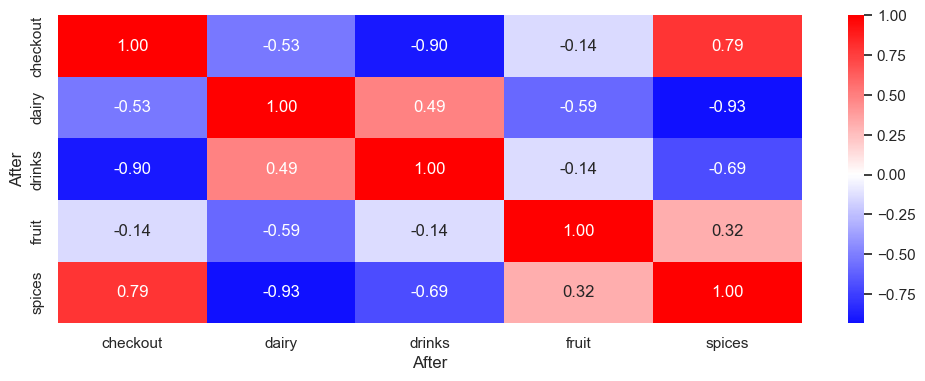

In [41]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,4)})
sns.heatmap(transition_prob.corr(numeric_only=True), cmap="bwr", annot=True, fmt="0.2f", center=0.0)